In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, f1_score,  classification_report,recall_score
import ipywidgets as widgets
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import datetime as dt
import numpy as np
import pandas as pd

In [5]:
data=pd.read_csv('main_data_with_weather.csv')
data.sample(5)

,province,max,min,wind,wind_d,rain,humidi,cloud,pressure,date,region,weather
151523,Hai Duong,27,22,15,ENE,1.7,82,50,1010,2010-04-22,Bắc,Gió
100472,Nha Trang,28,21,16,ESE,0.0,78,15,1015,2013-02-01,Trung,Lạnh
73700,My Tho,34,25,16,ESE,0.0,62,46,1011,2015-03-11,Nam,Nắng
94154,Uong Bi,31,26,8,SE,0.4,78,10,1007,2014-09-06,Bắc,Gió
101556,Nha Trang,33,25,8,SSE,0.0,74,9,1010,2018-04-25,Trung,Nắng


# Infomation of data
province: Tỉnh

max: Nhiệt độ cao nhất (°C)

min: Nhiệt độ thấp nhất (°C)

wind: Tốc độ gió (km/h)

wind_d: Hướng gió

rain: Lượng mưa (mm)

humidi: Độ ẩm (%)

cloud: Độ che phủ mây (%)

pressure: Áp suất khí quyển (hPa)

date: Ngày ghi nhận

In [6]:
data.describe()

,max,min,wind,rain,humidi,cloud,pressure
count,181960.000000,181960.000000,181960.000000,181960.000000,181960.000000,181960.000000,181960.000000
mean,29.837277,23.277874,11.038657,6.567130,77.083068,41.721268,1010.229127
std,4.571345,3.945381,5.311807,13.602055,9.288553,23.875067,4.635714
min,4.000000,2.000000,1.000000,0.000000,23.000000,0.000000,988.000000
25%,28.000000,21.000000,7.000000,0.100000,71.000000,23.000000,1008.000000
50%,31.000000,24.000000,10.000000,1.800000,78.000000,38.000000,1010.000000
75%,33.000000,26.000000,14.000000,7.500000,83.000000,58.000000,1012.000000
max,46.000000,32.000000,54.000000,596.400000,100.000000,100.000000,1038.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181960 entries, 0 to 181959
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   province  181960 non-null  object 
 1   max       181960 non-null  int64  
 2   min       181960 non-null  int64  
 3   wind      181960 non-null  int64  
 4   wind_d    181960 non-null  object 
 5   rain      181960 non-null  float64
 6   humidi    181960 non-null  int64  
 7   cloud     181960 non-null  int64  
 8   pressure  181960 non-null  int64  
 9   date      181960 non-null  object 
 10  region    181960 non-null  object 
 11  weather   181960 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 16.7+ MB


In [8]:
# chia dữ liệu các tỉnh khác nhau
data_province={}
for i in data['province'].value_counts().keys():
    data_province[i]=data[data['province']==i]
data_province.keys()

dict_keys(['Bac Lieu', 'Ho Chi Minh City', 'Nha Trang', 'Viet Tri', 'Chau Doc', 'Phan Rang', 'Vinh', 'Da Lat', 'Phan Thiet', 'Vinh Long', 'Ha Noi', 'Play Cu', 'Vung Tau', 'Hai Duong', 'Qui Nhon', 'Yen Bai', 'Hai Phong', 'Rach Gia', 'Hanoi', 'Can Tho', 'Uong Bi', 'Nam Dinh', 'Buon Me Thuot', 'Tam Ky', 'Ben Tre', 'Hoa Binh', 'Tan An', 'Bien Hoa', 'Hong Gai', 'Thai Nguyen', 'Hue', 'Cam Ranh', 'Thanh Hoa', 'Ca Mau', 'Long Xuyen', 'Tra Vinh', 'Cam Pha', 'My Tho', 'Tuy Hoa', 'Soc Trang'])

In [9]:
for i,j in data_province.items():
    temp=pd.DataFrame(data_province[i])
    temp.to_csv(f'data_{i}.csv')

## Chuẩn bị dữ liệu

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd

# Đọc dữ liệu và loại bỏ cột Unname
file_path = 'main_data_with_weather.csv'
data = pd.read_csv(file_path,index_col=0)


In [11]:
# kiểm tra xem có dữ liệu thiếu không
missing_values = data.isnull().sum()
missing_values


max         0
min         0
wind        0
wind_d      0
rain        0
humidi      0
cloud       0
pressure    0
date        0
region      0
weather     0
dtype: int64

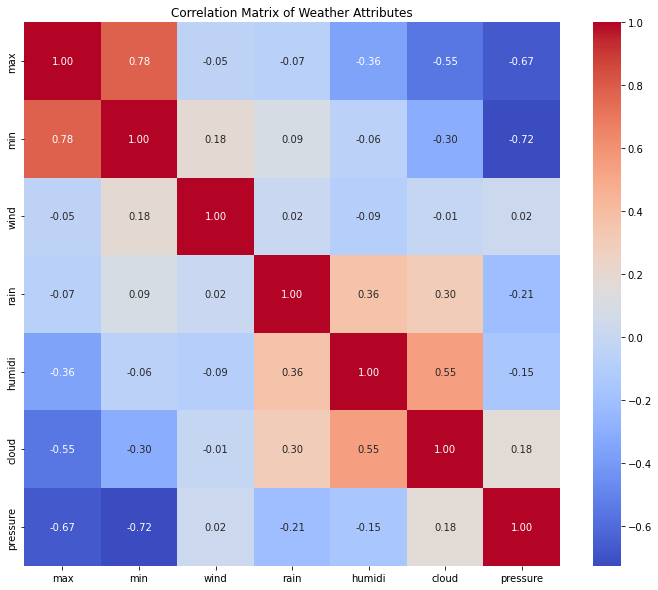

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
# Tính ma trận tương quan giữa các thuộc tính
correlation_matrix = data.corr()
# Vẽ biểu đồ nhiệt độ tương quan
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Weather Attributes")
plt.show()


Nhìn vào ma trận tương quan giữa các thuộc tính thời tiết, chúng ta có thể rút ra một số nhận xét quan trọng liên quan đến việc lựa chọn mô hình dự đoán:

1. **Tương quan mạnh**:
    - Một số thuộc tính có tương quan mạnh với nhau, ví dụ như:
        - `max` và `min` có tương quan dương rất cao (0.67).
        - `humidi` có tương quan dương với `rain` (0.36) và `cloud` (0.55).
    - Điều này cho thấy các thuộc tính này có thể dự đoán tốt hơn bằng cách sử dụng lẫn nhau.

2. **Tương quan yếu hoặc không đáng kể**:
    - Một số thuộc tính có tương quan yếu hoặc gần như không có tương quan, ví dụ như:
        - `wind` và hầu hết các thuộc tính khác như `max`, `min`, `rain`, `humidi`, `cloud`, và `pressure`.
    - Điều này cho thấy `wind` không phụ thuộc nhiều vào các thuộc tính khác, và việc dự đoán `wind` có thể không hiệu quả khi sử dụng các thuộc tính khác.

3. **Mô hình phù hợp**:
    - Dựa trên ma trận tương quan, chúng ta có thể thấy rằng các thuộc tính có mối quan hệ phức tạp và không tuyến tính với nhau.
    - Mô hình rừng ngẫu nhiên (Random Forest) là một mô hình mạnh mẽ cho các dữ liệu có nhiều thuộc tính với các mối quan hệ phức tạp. Nó có khả năng xử lý tốt các dữ liệu không tuyến tính và có thể kết hợp các thuộc tính với tương quan cao và thấp một cách hiệu quả.
    - Với khả năng chọn lọc đặc tính tự động và đưa ra dự đoán dựa trên nhiều cây quyết định, rừng ngẫu nhiên có thể tối ưu hóa việc dự đoán các thuộc tính thời tiết dựa trên các mẫu dữ liệu phức tạp.

4. **Không nên sử dụng mô hình tuyến tính đơn giản**:
    - Vì có nhiều mối quan hệ không tuyến tính và phức tạp giữa các thuộc tính, sử dụng mô hình tuyến tính đơn giản như hồi quy tuyến tính có thể không hiệu quả.
    - Mô hình tuyến tính không thể nắm bắt được tất cả các tương quan phức tạp và phi tuyến tính trong dữ liệu này.

=> việc lựa chọn mô hình rừng ngẫu nhiên là phù hợp do khả năng xử lý dữ liệu phức tạp và không tuyến tính, và không nên sử dụng mô hình tuyến tính đơn giản để dự đoán tất cả các thuộc tính.

Loại bỏ các giá trị ngoại lệ, tăng hiệu xuất mô hình

C:\Users\Pc\AppData\Local\Temp\ipykernel_16984\2182564673.py:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_clean = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]


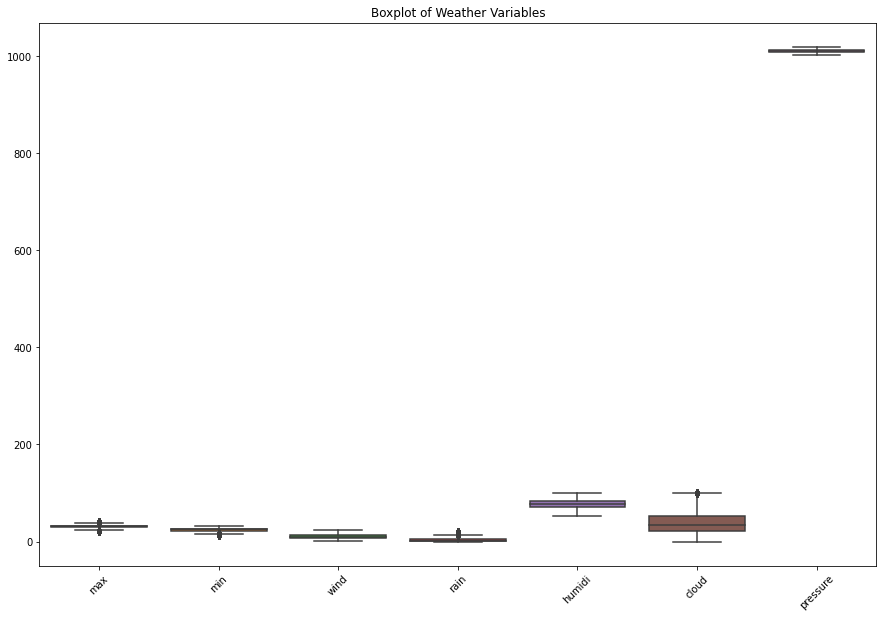

(143894, 11)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
# Xử lý ngoại lệ sử dụng Interquartile Range (IQR)
#Tính các giá trị phần tư đầu tiên (Q1):
Q1 = data.quantile(0.25)
#Tính các giá trị phần tư thứ ba (Q3):
Q3 = data.quantile(0.75)
#Tính Interquartile Range (IQR
IQR = Q3 - Q1
data_clean = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
# Vẽ biểu đồ boxplot
plt.figure(figsize=(15, 10))
# sns.boxplot(data=data_clean.drop(['province', 'date'], axis=1))
sns.boxplot(data=data_clean.drop([ 'date'], axis=1))
plt.title('Boxplot of Weather Variables')
plt.xticks(rotation=45)
plt.show()
data_clean.shape

### Giải thích lý thuyết thuật toán Rừng ngẫu nhiên (Random Forest)

Rừng ngẫu nhiên (Random Forest) là một thuật toán học máy mạnh mẽ và linh hoạt, được sử dụng cho cả bài toán hồi quy (regression) và phân loại (classification). Nó hoạt động bằng cách tạo ra nhiều cây quyết định (decision trees) trong quá trình huấn luyện và sử dụng trung bình hoặc bỏ phiếu của các cây đó để cải thiện độ chính xác và kiểm soát vấn đề quá khớp (overfitting).

#### Nguyên lý cơ bản của Rừng ngẫu nhiên:

1. **Tập hợp nhiều cây quyết định (Ensemble of Decision Trees)**:
    - Rừng ngẫu nhiên tạo ra nhiều cây quyết định độc lập. Mỗi cây được huấn luyện trên một mẫu ngẫu nhiên khác nhau của tập huấn luyện (bagging).
    - Mỗi cây quyết định trong rừng ngẫu nhiên được huấn luyện với một tập con ngẫu nhiên của các thuộc tính (features), giúp giảm sự tương quan giữa các cây và tăng tính đa dạng của mô hình.

2. **Bagging (Bootstrap Aggregating)**:
    - Bagging là phương pháp chọn ngẫu nhiên một mẫu (có lặp lại) từ tập dữ liệu ban đầu để huấn luyện từng cây quyết định. Điều này tạo ra các cây khác nhau và giảm vấn đề quá khớp (overfitting).

3. **Random Feature Selection**:
    - Trong quá trình xây dựng mỗi cây quyết định, một tập con ngẫu nhiên của các thuộc tính được chọn để tìm kiếm thuộc tính tốt nhất để tách dữ liệu tại mỗi nút (split). Điều này tăng tính ngẫu nhiên và làm cho các cây trong rừng đa dạng hơn.

4. **Kết hợp dự đoán**:
    - Đối với bài toán phân loại, kết quả cuối cùng được xác định bằng cách lấy kết quả bỏ phiếu đa số từ các cây quyết định.
    - Đối với bài toán hồi quy, kết quả cuối cùng là trung bình của các dự đoán từ các cây quyết định.

#### Ưu điểm của Rừng ngẫu nhiên:

1. **Độ chính xác cao**:
    - Rừng ngẫu nhiên thường đạt được độ chính xác cao do việc kết hợp dự đoán từ nhiều cây quyết định độc lập.
  
2. **Khả năng chống quá khớp (Overfitting)**:
    - Việc sử dụng nhiều cây và mẫu ngẫu nhiên giúp giảm thiểu nguy cơ quá khớp so với việc sử dụng một cây quyết định duy nhất.

3. **Xử lý dữ liệu không cân bằng**:
    - Rừng ngẫu nhiên hoạt động tốt với dữ liệu có độ phân phối không đồng đều và có thể xử lý các tập dữ liệu lớn với nhiều thuộc tính.

4. **Xử lý dữ liệu mất mát và giá trị ngoại lệ**:
    - Rừng ngẫu nhiên ít bị ảnh hưởng bởi các giá trị ngoại lệ và có thể xử lý dữ liệu thiếu tốt hơn so với nhiều thuật toán khác.

#### Hạn chế của Rừng ngẫu nhiên:

1. **Chi phí tính toán cao**:
    - Việc huấn luyện và dự đoán với nhiều cây quyết định có thể tốn nhiều thời gian và tài nguyên tính toán, đặc biệt với các tập dữ liệu lớn.

2. **Khó giải thích**:
    - Mặc dù rừng ngẫu nhiên có thể cung cấp độ chính xác cao, nó không dễ giải thích như một cây quyết định đơn lẻ. Việc hiểu lý do tại sao mô hình đưa ra một dự đoán cụ thể có thể phức tạp hơn.

### Ứng dụng trong đoạn mã:

Trong đoạn, Rừng ngẫu nhiên được sử dụng cho cả bài toán hồi quy và phân loại:

- **Hồi quy**:
    - Mô hình `RandomForestRegressor` được huấn luyện để dự đoán các thuộc tính thời tiết dạng số (`max`, `min`, `wind`, `rain`, `humidi`, `cloud`, `pressure`).
  
- **Phân loại**:
    - Mô hình `RandomForestClassifier` được huấn luyện để dự đoán các thuộc tính phân loại (`wind_d_encoded`, `weather_encoded`).

Dưới đây là các bước chính trong đoạn mã:

1. **Tiền xử lý dữ liệu**:
    - Chuyển đổi các thuộc tính dạng phân loại (`wind_d`, `weather`) thành dạng số sử dụng `LabelEncoder`.
    - Tạo các thuộc tính mới từ cột `date`.

2. **Chia tách dữ liệu thành tập huấn luyện và kiểm tra**:
    - Sử dụng `train_test_split` để chia dữ liệu cho cả hồi quy và phân loại.

3. **Huấn luyện mô hình**:
    - Huấn luyện mô hình hồi quy (`RandomForestRegressor`) và phân loại (`RandomForestClassifier`) với các tập dữ liệu tương ứng.

4. **Đánh giá hiệu suất**:
    - Tính toán và in ra các chỉ số hiệu suất như RMSE, MAE cho hồi quy và độ chính xác (accuracy) cho phân loại.

5. **Dự đoán**:
    - Định nghĩa hàm `predict_weather` để dự đoán các thuộc tính thời tiết dựa trên ngày nhập vào.


IQR=Q3−Q1

IQR cung cấp một thước đo của sự phân tán trung bình 50% dữ liệu. Nó ít bị ảnh hưởng bởi các giá trị cực đoan (outliers) hơn so với phạm vi tổng (range) của dữ liệu.


các giá trị được xem là ngoại lệ nếu nó nằm ngoài khoảng [Q1−1.5×IQR,Q3+1.5×IQR]

## Rừng ngẫu nhiên

In [14]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
import ipywidgets as widgets
from IPython.display import display

def load_and_prepare_data(province):
    file_path = f"data_{province}.csv"
    data = pd.read_csv(file_path)
    data['date'] = pd.to_datetime(data['date'])
    # Xử lý outliers, loại trừ cột 'date' khi tính toán
    numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()
    Q1 = data[numerical_cols].quantile(0.25)
    Q3 = data[numerical_cols].quantile(0.75)
    IQR = Q3 - Q1
    data_clean = data.loc[~((data[numerical_cols] < (Q1 - 1.5 * IQR)) | (data[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)].copy()
    # Mã hóa dữ liệu dạng phân loại
    wind_d_encoder = LabelEncoder()
    weather_encoder = LabelEncoder()
    data_clean.loc[:, 'wind_d_encoded'] = wind_d_encoder.fit_transform(data_clean['wind_d'])
    data_clean.loc[:, 'weather_encoded'] = weather_encoder.fit_transform(data_clean['weather'])
    # Kỹ thuật tính năng
    data_clean.loc[:, 'year'] = data_clean['date'].dt.year
    data_clean.loc[:, 'month'] = data_clean['date'].dt.month
    data_clean.loc[:, 'day'] = data_clean['date'].dt.day
    data_clean.loc[:, 'dayofweek'] = data_clean['date'].dt.dayofweek
    return data_clean, wind_d_encoder, weather_encoder

def train_models(data):
    # Chia tách các đặc trưng cho hồi quy và phân loại
    features = data[['year', 'month', 'day', 'dayofweek', 'wind_d_encoded', 'weather_encoded']]
    targets_regression = data[['max', 'min', 'wind', 'rain', 'humidi', 'cloud', 'pressure']]
    target_classification = data[['wind_d_encoded', 'weather_encoded']]
    # Chia tách tập huấn luyện và kiểm tra cho hồi quy
    X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(features, targets_regression, test_size=0.3, random_state=42)
    # Chia tách tập huấn luyện và kiểm tra cho phân loại
    X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(features, target_classification, test_size=0.3, random_state=42)
    # Hồi quy Rừng ngẫu nhiên
    regressor = RandomForestRegressor(n_estimators=100, random_state=42)
    regressor.fit(X_train_reg, y_train_reg)
    # Phân loại Rừng ngẫu nhiên cho hướng gió và thời tiết
    classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    classifier.fit(X_train_class, y_train_class)
    return regressor, classifier, X_test_reg, y_test_reg, X_test_class, y_test_class

def evaluate_models(regressor, classifier, X_test_reg, y_test_reg, X_test_class, y_test_class, wind_d_encoder, weather_encoder):
    # Đánh giá hiệu suất cho hồi quy
    predictions_reg = regressor.predict(X_test_reg)
    rmse = np.sqrt(mean_squared_error(y_test_reg, predictions_reg, multioutput='raw_values'))
    mae = mean_absolute_error(y_test_reg, predictions_reg, multioutput='raw_values')
    # Đánh giá hiệu suất cho phân loại
    predictions_class = classifier.predict(X_test_class)
    # Tính toán độ chính xác cho mỗi thuộc tính trong phân loại
    accuracies = []
    for i in range(y_test_class.shape[1]):
        accuracy = accuracy_score(y_test_class.iloc[:, i], predictions_class[:, i])
        accuracies.append(accuracy)
        print(f'Độ chính xác của mô hình phân loại {i}: {accuracy*100}%')
    # Tính toán độ chính xác trung bình cho phân loại
    mean_classification_accuracy = np.mean(accuracies)
    # Tính toán tỷ lệ phần trăm chính xác cho hồi quy
    range_y_test_reg = y_test_reg.max() - y_test_reg.min()
    regression_accuracy = 100 * (1 - rmse / range_y_test_reg)
    # In ra tỷ lệ phần trăm chính xác cho từng thuộc tính hồi quy
    print("Tỷ lệ phần trăm chính xác của từng thuộc tính hồi quy:")
    for i, col in enumerate(['max', 'min', 'wind', 'rain', 'humidi', 'cloud', 'pressure']):
        print(f"{col} - Accuracy: {regression_accuracy[i]:.2f}%")
    # In ra tỷ lệ phần trăm chính xác trung bình của mô hình phân loại
    print(f"Độ chính xác trung bình của mô hình phân loại: {mean_classification_accuracy * 100:.2f}%")
    # Tính toán độ chính xác trung bình tổng thể
    overall_mean_accuracy = (mean_classification_accuracy * 100 + regression_accuracy.mean()) / 2
    # In ra độ chính xác trung bình tổng thể
    print(f"Độ chính xác trung bình tổng thể của mô hình: {overall_mean_accuracy:.2f}%")
    rfr_mse = mean_squared_error(y_test_reg, predictions_reg, multioutput="uniform_average")
    print(f"Mean Squared Error of Random Forest Regressor: {rfr_mse:.2f}")
    return overall_mean_accuracy, rfr_mse

def predict_weather(province, date_input):
    data, wind_d_encoder, weather_encoder = load_and_prepare_data(province)
    regressor, classifier, X_test_reg, y_test_reg, X_test_class, y_test_class = train_models(data)
    date = pd.to_datetime(date_input)
    
    # Tạo các đặc trưng đầu vào cho dự đoán
    input_features = pd.DataFrame({
        'year': [date.year],
        'month': [date.month],
        'day': [date.day],
        'dayofweek': [date.dayofweek],
        'wind_d_encoded': [int(np.median(data['wind_d_encoded']))],  # Sử dụng giá trị trung vị làm mặc định cho dự đoán
        'weather_encoded': [int(np.median(data['weather_encoded']))]  # Sử dụng giá trị trung vị làm mặc định cho dự đoán
    })
    
    # Dự đoán các thuộc tính thời tiết dạng số
    predicted_values = regressor.predict(input_features)
    weather_results = dict(zip(['max', 'min', 'wind', 'rain', 'humidity', 'cloud', 'pressure'], predicted_values[0]))
    
    # Dự đoán thuộc tính thời tiết dạng phân loại cho weather
    weather_encoded_prediction = classifier.predict(input_features)
    weather_decoded_prediction = weather_encoder.inverse_transform(weather_encoded_prediction[:, 1])
    weather_results['weather'] = weather_decoded_prediction[0]

    # Dự đoán thuộc tính thời tiết dạng phân loại cho wind_d
    wind_d_encoded_prediction = classifier.predict(input_features)
    wind_d_decoded_prediction = wind_d_encoder.inverse_transform(wind_d_encoded_prediction[:, 0])
    weather_results['wind_d'] = wind_d_decoded_prediction[0]
    
    # Đánh giá mô hình và in ra kết quả
    overall_mean_accuracy, rfr_mse = evaluate_models(regressor, classifier, X_test_reg, y_test_reg, X_test_class, y_test_class, wind_d_encoder, weather_encoder)
    
    return weather_results, overall_mean_accuracy, rfr_mse


# Tạo bảng điều khiển để tiện hơn
province_list = data_province.keys()
province_dropdown = widgets.Dropdown(options=province_list, description='Province:')
date_picker = widgets.DatePicker(description='Date:')

def on_button_click(b):
    province = province_dropdown.value
    date_input = date_picker.value
    predicted_weather, overall_mean_accuracy, rfr_mse = predict_weather(province, date_input)
    print(f"Weather prediction for {province} on {date_input}:")
    print(predicted_weather)
    print(f"Overall Mean Accuracy: {overall_mean_accuracy:.2f}%")
    print(f"Mean Squared Error of Random Forest Regressor: {rfr_mse:.2f}")

button = widgets.Button(description="Predict Weather")
button.on_click(on_button_click)

display(province_dropdown, date_picker, button)
# print(overall_mean_accuracy, rfr_mse)

Dropdown(description='Province:', options=('Bac Lieu', 'Ho Chi Minh City', 'Nha Trang', 'Viet Tri', 'Chau Doc'…

DatePicker(value=None, description='Date:', step=1)

Button(description='Predict Weather', style=ButtonStyle())

# Decision Tree 

In [15]:
data = pd.read_csv('main_data_with_weather.csv')

# Tính các giá trị phần tư thứ nhất (Q1) và phần tư thứ ba (Q3)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

# Tính Interquartile Range (IQR)
IQR = Q3 - Q1

# Lọc các outliers
data_clean = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

C:\Users\Pc\AppData\Local\Temp\ipykernel_16984\3444968173.py:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_clean = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]


In [16]:
data = data_clean
province_encoder = LabelEncoder()
region_encoder = LabelEncoder()
wind_d_encoder = LabelEncoder()
weather_encoder = LabelEncoder()
date_encoder = LabelEncoder()

data['province'] = province_encoder.fit_transform(data['province'])
data['region'] = region_encoder.fit_transform(data['region'])
data['wind_d'] = wind_d_encoder.fit_transform(data['wind_d'])
data['weather'] = weather_encoder.fit_transform(data['weather'])
data['date'] = date_encoder.fit_transform(data['date'])

X = data.drop(['weather'], axis=1)
y = data['weather']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42, max_depth=15, min_samples_split=10, min_samples_leaf=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report = classification_report(y_test, y_pred)
dt_accuracy = accuracy_score(y_test, y_pred) * 100
dt_f1 = f1_score(y_test, y_pred, average="weighted")
dt_recall = recall_score(y_test, y_pred, average="weighted")
dt_mse = mean_squared_error(y_test, y_pred)
dt_mae = mean_absolute_error(y_test, y_pred)

print(f"Accuracy: {round(dt_accuracy,2)}%")
print(f"F1 Score: {dt_f1}")
print(f"Recall Score: {dt_recall}")
print("Mean Squared Error (MSE):", dt_mse)
print("Mean Absolute Error (MAE):", dt_mae)
print("Classification Report:\n", report)

Accuracy: 92.46%
F1 Score: 0.9244449315211053
Recall Score: 0.9245977970047604
Mean Squared Error (MSE): 1.0272768338024254
Mean Absolute Error (MAE): 0.24191250564647834
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.89      0.91      6220
           1       0.87      0.87      0.87       516
           2       0.98      0.98      0.98      2543
           3       0.93      0.96      0.94      3666
           4       0.92      0.89      0.91      4900
           5       0.91      0.94      0.92     10934

    accuracy                           0.92     28779
   macro avg       0.92      0.92      0.92     28779
weighted avg       0.92      0.92      0.92     28779



In [17]:
number = np.random.randint(0, len(X_test))
new_sample = X_test.iloc[number].values.reshape(1, -1)
predicted_weather = model.predict(new_sample)
predicted_weather_label = weather_encoder.inverse_transform(predicted_weather)
true_weather = y_test.iloc[number]
true_weather_label = weather_encoder.inverse_transform([true_weather])[0]

selected_row = X_test.iloc[number]
print("Selected Data Row:")
for col_name, value in selected_row.items():
    print(f'{col_name}: {value}')

print(f'\nPredicted Weather: {predicted_weather_label[0]}')
print(f'True Weather: {true_weather_label}')



Selected Data Row:
province: 1.0
max: 33.0
min: 26.0
wind: 15.0
wind_d: 13.0
rain: 12.7
humidi: 77.0
cloud: 46.0
pressure: 1009.0
date: 2444.0
region: 2.0

Predicted Weather: Mưa
True Weather: Mưa


C:\Users\Pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


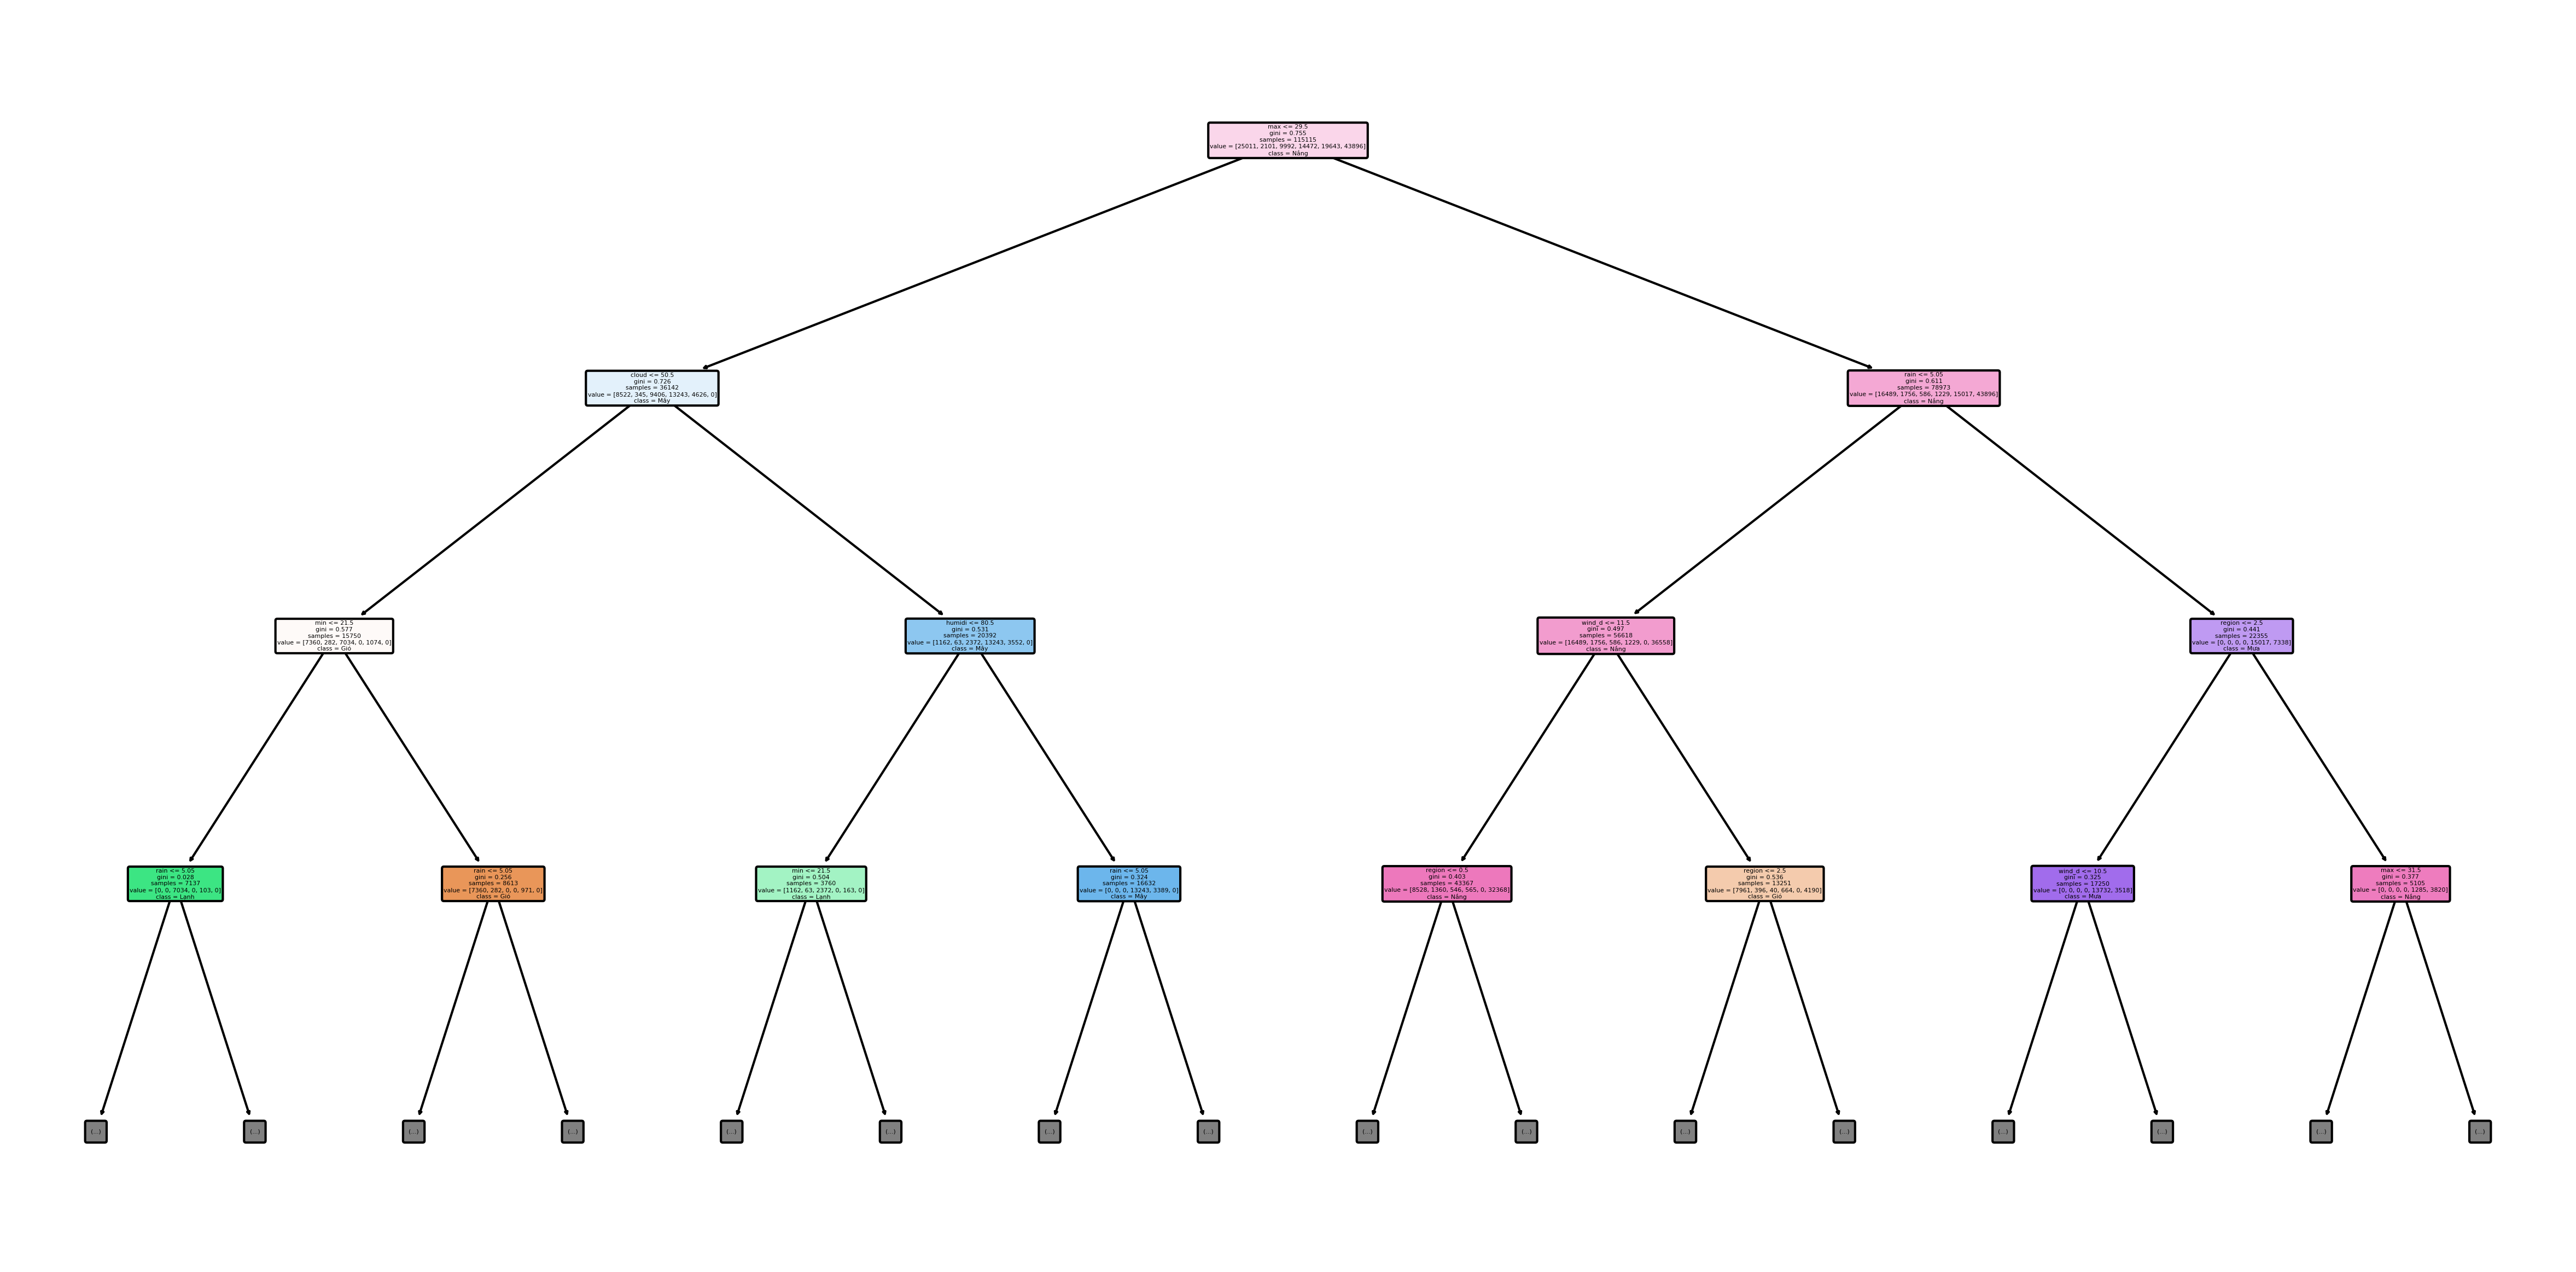

In [18]:
# Chuyển đổi tên lớp thành chuỗi để đảm bảo tính tương thích
class_names = [str(name) for name in weather_encoder.classes_]

# Vẽ cây quyết định
plt.figure(figsize=(20, 10), dpi=300)
plot_tree(model, feature_names=X.columns, class_names=class_names, filled=True, rounded=True, max_depth=3)
plt.show()

- Điều kiện phân chia (rain <= 5.05):

Đây là điều kiện mà cây quyết định sử dụng để phân tách dữ liệu tại node này. Các mẫu thỏa mãn điều kiện này sẽ đi vào nhánh trái, ngược lại sẽ đi vào nhánh phải.
- Chỉ số Gini (gini = 0.78):

Chỉ số này đo lường sự hỗn loạn hoặc không đồng nhất trong node. Chỉ số Gini dao động từ 0 (tất cả các mẫu đều thuộc một lớp) đến 0.5 (các lớp được phân bố đồng đều). Chỉ số Gini là 0.78 cho thấy mức độ không đồng nhất cao trong node này.
- Số lượng mẫu (samples = 145568):

Đây là tổng số mẫu dữ liệu có trong node gốc. Node gốc luôn chứa toàn bộ dữ liệu huấn luyện.
- Giá trị (value = [66, 27362, 2384, 18097, 19927, 30063, 47669]):

Đây là số lượng mẫu thuộc từng lớp trong node. Ví dụ:
66 mẫu thuộc lớp 1.
27362 mẫu thuộc lớp 2.
2384 mẫu thuộc lớp 3.
18097 mẫu thuộc lớp 4.
19927 mẫu thuộc lớp 5.
30063 mẫu thuộc lớp 6.
47669 mẫu thuộc lớp 7 (nắng).
- Lớp chiếm ưu thế (class = nắng):

Đây là lớp có số lượng mẫu lớn nhất trong node gốc. Trong trường hợp này, lớp "nắng" chiếm ưu thế với 47669 mẫu.

# Vẽ biểu đồ so sánh 2 mô hình

In [19]:
s,t=0,0
for i in data_province.keys():
    predicted_weather, overall_mean_accuracy, rfr_mse = predict_weather(i,12/12/2024)
    s+=rfr_mse
    t+=overall_mean_accuracy
rfr_mse_mean=s/len(data_province.keys())
overall_mean_accuracy_mean=t/len(data_province.keys())
rfr_mse_mean,overall_mean_accuracy_mean

Độ chính xác của mô hình phân loại 0: 97.00249791840133%
Độ chính xác của mô hình phân loại 1: 99.91673605328893%
Tỷ lệ phần trăm chính xác của từng thuộc tính hồi quy:
max - Accuracy: 87.02%
min - Accuracy: 90.83%
wind - Accuracy: 86.99%
rain - Accuracy: 85.23%
humidi - Accuracy: 90.51%
cloud - Accuracy: 84.17%
pressure - Accuracy: 89.42%
Độ chính xác trung bình của mô hình phân loại: 98.46%
Độ chính xác trung bình tổng thể của mô hình: 93.10%
Mean Squared Error of Random Forest Regressor: 28.63
Độ chính xác của mô hình phân loại 0: 97.86392405063292%
Độ chính xác của mô hình phân loại 1: 99.92088607594937%
Tỷ lệ phần trăm chính xác của từng thuộc tính hồi quy:
max - Accuracy: 89.84%
min - Accuracy: 89.74%
wind - Accuracy: 86.85%
rain - Accuracy: 83.87%
humidi - Accuracy: 91.65%
cloud - Accuracy: 84.89%
pressure - Accuracy: 89.42%
Độ chính xác trung bình của mô hình phân loại: 98.89%
Độ chính xác trung bình tổng thể của mô hình: 93.46%
Mean Squared Error of Random Forest Regressor: 29

(36.42822980502253, 92.81808151442516)

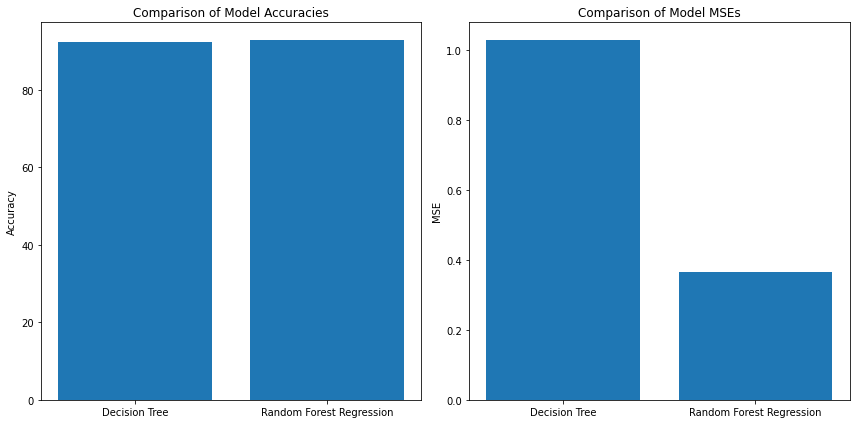

In [20]:
import matplotlib.pyplot as plt
# Accuracy values
accuracies = [dt_accuracy, overall_mean_accuracy_mean]
mses = [dt_mse,rfr_mse_mean/100]
# Model names
models = ['Decision Tree', 'Random Forest Regression']
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(models, accuracies)
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
# Create MSE bar plot
plt.subplot(1, 2, 2)
plt.bar(models, mses)
plt.ylabel('MSE')
plt.title('Comparison of Model MSEs')

# Display the plots
plt.tight_layout()
plt.show()